# TIKZ-Feynman

In [1]:
from pyfeyn2.feynmandiagram import FeynmanDiagram, Leg, Propagator, Vertex
from pyfeyn2.render.tikzfeynman import TikzFeynmanRender
from pyfeyn2.render.dot import feynman_adjust_points

## Simple Case

We set the positions of all vertices here.

In [2]:
fd = FeynmanDiagram()
v1 = Vertex("v1").set_xy(-1, 0)
v2 = Vertex("v2").set_xy(1, 0)
p1 = Propagator("p1").connect(v1, v2).set_type("gluon")
l1 = Leg("l1").set_target(v1).set_xy(-2, 1).set_type("gluon").set_incoming()
l2 = Leg("l2").set_target(v1).set_xy(-2, -1).set_type("gluon").set_incoming()
l3 = Leg("l3").set_target(v2).set_xy(2, 1).set_type("gluon").set_outgoing()
l4 = Leg("l4").set_target(v2).set_xy(2, -1).set_type("gluon").set_outgoing()
p1.set_source(v1)
p1.set_target(v2)
fd.propagators.append(p1)
fd.vertices.extend([v1, v2])
fd.legs.extend([l1, l2, l3, l4])

In [3]:
tfd = TikzFeynmanRender(fd)
print(tfd.get_src())

\documentclass[preview,crop,tikz]{standalone}%
\usepackage[T1]{fontenc}%
\usepackage[utf8]{inputenc}%
\usepackage{lmodern}%
\usepackage{textcomp}%
\usepackage{lastpage}%
%
\RequirePackage{luatex85}%
\usepackage[compat=1.1.0]{tikz-feynman}%
%
\begin{document}%
\normalsize%
\begin{tikzpicture}
\begin{feynman}
	\vertex (v1) [label=] at (-1.0,0.0);
	\vertex (v2) [label=] at (1.0,0.0);
	\vertex (l1) [label=] at (-2.0,1.0);
	\vertex (l2) [label=] at (-2.0,-1.0);
	\vertex (l3) [label=] at (2.0,1.0);
	\vertex (l4) [label=] at (2.0,-1.0);
	\diagram*{
		(v1) -- [gluon] (v2),
		(l1) -- [gluon] (v1),
		(l2) -- [gluon] (v1),
		(v2) -- [gluon] (l3),
		(v2) -- [gluon] (l4),
	};
\end{feynman}
\end{tikzpicture}
%
\end{document}


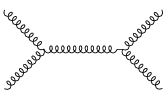

In [4]:
tfd.render("test.pdf")

## Complicated Case

We only set the positions of the Legs here.

In [5]:
fd = FeynmanDiagram()
v1 = Vertex("v1")
v2 = Vertex("v2")
v3 = Vertex("v3")
v4 = Vertex("v4")
p1 = Propagator("p1").connect(v1, v2).set_type("gluon")
p2 = Propagator("p2").connect(v1, v3).set_type("gluon")
p3 = Propagator("p3").connect(v3, v2).set_type("gluon")
p4 = Propagator("p4").connect(v4, v3).set_type("gluon")
p5 = Propagator("p5").connect(v4, v2).set_type("gluon")
l1 = Leg("l1").set_target(v1).set_type("gluon").set_incoming().set_xy(-2, 1)
l2 = Leg("l2").set_target(v1).set_type("gluon").set_incoming().set_xy(-2, -1)
l3 = Leg("l3").set_target(v2).set_type("gluon").set_outgoing().set_xy(2, -2)
l4 = Leg("l4").set_target(v3).set_type("gluon").set_outgoing().set_xy(2, 2)
l5 = Leg("l5").set_target(v4).set_type("gluon").set_outgoing().set_xy(2, 1)
l6 = Leg("l6").set_target(v4).set_type("gluon").set_outgoing().set_xy(2, -1)

fd.propagators.extend([p1, p2, p3, p4, p5])
fd.vertices.extend([v1, v2, v3, v4])
fd.legs.extend([l1, l2, l3, l4, l5, l6])

Now calculate the positions of vertices.

In [6]:
ffd= feynman_adjust_points(fd)

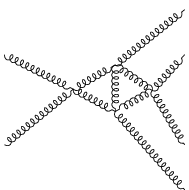

In [7]:
TikzFeynmanRender(ffd).render()

graph G {
rankdir=LR;
layout=neato;
node [style="invis"];
		Leg14 [ pos="-2.0,0.0!"];
		Leg15 [ pos="2.0,0.0!"];
edge [style="decorate,decoration=coil,aspect=0.3,segment length=1mm"];
		Vertex0 -- Vertex1;
edge [style="decorate,decoration=coil,aspect=0.3,segment length=1mm"];
		Vertex1 -- Vertex2;
edge [style="decorate,decoration=coil,aspect=0.3,segment length=1mm"];
		Vertex0 -- Vertex3;
edge [style="decorate,decoration=coil,aspect=0.3,segment length=1mm"];
		Vertex1 -- Vertex4;
edge [style="decorate,decoration=coil,aspect=0.3,segment length=1mm"];
		Vertex2 -- Vertex5;
edge [style="decorate,decoration=coil,aspect=0.3,segment length=1mm"];
		Vertex4 -- Vertex5;
edge [style="decorate,decoration=coil,aspect=0.3,segment length=1mm"];
		Vertex3 -- Vertex4;
edge [style="decorate,decoration=coil,aspect=0.3,segment length=1mm"];
		Vertex3 -- Vertex5;
edge [style="decorate,decoration=coil,aspect=0.3,segment length=1mm"];
		Leg14 -- Vertex0;
edge [style="decorate,decoration=coil,aspect=0.3,seg

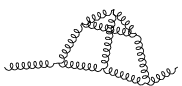

In [8]:
from pyfeyn2.render.dot import DotRender, feynman_to_dot
fd = FeynmanDiagram()

v1 = Vertex()
v2 = Vertex()
v3 = Vertex()
v4 = Vertex()
v5 = Vertex()
v6 = Vertex()

p1 = Propagator().connect(v1, v2).set_type("gluon")
p2 = Propagator().connect(v2, v3).set_type("gluon")
p3 = Propagator().connect(v1, v4).set_type("gluon")
p4 = Propagator().connect(v2, v5).set_type("gluon")
p5 = Propagator().connect(v3, v6).set_type("gluon")
p6 = Propagator().connect(v5, v6).set_type("gluon")
p7 = Propagator().connect(v4, v5).set_type("gluon")
p8 = Propagator().connect(v4, v6).set_type("gluon")

l1 = Leg().set_target(v1).set_type("gluon").set_incoming().set_xy(-2, 0)
l2 = Leg().set_target(v3).set_type("gluon").set_outgoing().set_xy(2, 0)

fd.propagators.extend([p1, p2, p3, p4, p5, p6, p7, p8])
fd.vertices.extend([v1, v2, v3, v4, v5, v6])
fd.legs.extend([l1, l2])
print(feynman_to_dot(fd))
ffd= feynman_adjust_points(fd)
TikzFeynmanRender(ffd).render()